Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

### Difference Between Linear Regression and Logistic Regression

**1. Purpose:**
   - **Linear Regression:** Predicts a continuous numerical outcome. It estimates the relationship between the dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.
   - **Logistic Regression:** Predicts a binary (or categorical) outcome. It models the probability of a certain class or event, such as pass/fail, win/lose, yes/no, etc.

**2. Output:**
   - **Linear Regression:** The output is a continuous value, which can theoretically range from negative to positive infinity.
   - **Logistic Regression:** The output is a probability value between 0 and 1. This probability is then typically converted into a binary outcome using a threshold (commonly 0.5).

**3. Model Equation:**
   - **Linear Regression:** The model equation is of the form:
     \[
     y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
     \]
     where \(y\) is the dependent variable and \(x_1, x_2, \dots, x_n\) are the independent variables.
   - **Logistic Regression:** The model uses the logistic function (sigmoid) to map the output to a probability. The equation is:
     \[
     \text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
     \]
     where \(p\) is the probability of the event occurring (e.g., success).

**4. Assumptions:**
   - **Linear Regression:** Assumes a linear relationship between the independent and dependent variables, homoscedasticity (constant variance of errors), and normally distributed errors.
   - **Logistic Regression:** Assumes a linear relationship between the independent variables and the log-odds of the dependent variable. It does not assume homoscedasticity or normally distributed errors.

**5. Use Cases:**
   - **Linear Regression:** Used when the target variable is continuous, such as predicting house prices, temperature, or sales figures.
   - **Logistic Regression:** Used when the target variable is categorical, particularly binary.

### Example Scenario for Logistic Regression

**Scenario:**
Suppose you are working on a healthcare project where you need to predict whether a patient will develop a certain disease (e.g., diabetes) based on features like age, weight, blood pressure, and cholesterol levels. The outcome is binary—either the patient will develop the disease (1) or will not develop it (0).

**Why Logistic Regression is Appropriate:**
In this case, logistic regression is more appropriate because the outcome variable is binary (disease/no disease). You are interested in modeling the probability that a patient will develop the disease given their features. Logistic regression will allow you to do this by estimating the probability of disease presence and classifying patients based on a threshold probability (e.g., 0.5).

In contrast, linear regression would not be suitable here because it could produce predictions outside the range of 0 to 1, which are not meaningful in the context of probabilities.

Let's solve the problem of predicting whether a patient will develop diabetes using logistic regression. We'll use a sample dataset (e.g., the Pima Indians Diabetes dataset) to demonstrate this. The dataset contains information about various medical predictor variables and one target variable, indicating whether or not a patient has diabetes.

We'll use Python and libraries like pandas, scikit-learn, and matplotlib to achieve this.

Step 1: Import Required Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (Pima Indians Diabetes dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: Preprocessing the Data


In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 3: Train the Logistic Regression Model


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

Step 4: Make Predictions and Evaluate the Model


In [ ]:
# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Step 5: Visualize the Results


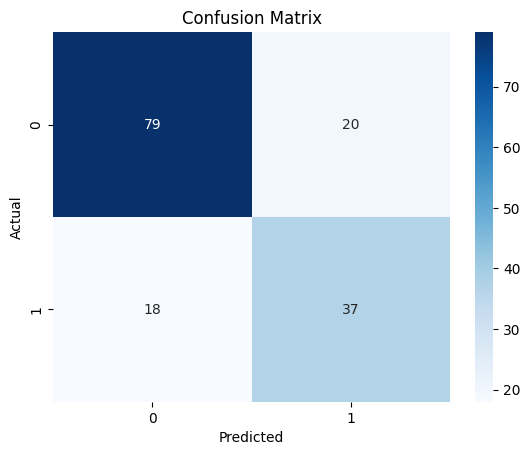

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 6: Interpretation of Results
* Accuracy: The proportion of correctly classified instances out of the total instances.
* Confusion Matrix: A table that summarizes the performance of the model, showing true positives, true negatives, false positives, and false negatives.
* Classification Report: Provides detailed performance metrics like precision, recall, F1-score, and support for each class.


## Summary
* The logistic regression model predicts whether a patient will develop diabetes based on the provided features.
* The accuracy and other performance metrics will help you understand how well the model is performing. You can fine-tune the model or experiment with other algorithms if needed.



Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function is known as **Log Loss** or **Cross-Entropy**. Let's break it down:

1. **Log Loss (Cross-Entropy):**
   - The Log Loss measures the difference between the predicted probabilities and the actual binary labels (0 or 1).
   - It quantifies how well the model's predictions align with the ground truth.
   - The formula for Log Loss is:
     $$ \text{Cost}(h_{\theta}(x), y) = \begin{cases} -\log(h_{\theta}(x)) & \text{if } y = 1 \\ -\log(1 - h_{\theta}(x)) & \text{if } y = 0 \end{cases} $$
     where:
     - \(h_{\theta}(x)\) represents the predicted probability (output of the sigmoid function) for input features \(x\).
     - \(y\) is the actual binary label (0 or 1).
   - The goal is to minimize this cost function during model training.

2. **Optimization:**
   - To find the optimal model parameters (weights), we use techniques like **gradient descent** or **Newton-Raphson**.
   - These optimization algorithms adjust the parameters iteratively to minimize the Log Loss.
   - The process involves computing gradients and updating weights until convergence.

Remember, Log Loss penalizes confident incorrect predictions more heavily, making it suitable for classification tasks.


Here's a Python program that implements logistic regression from scratch using the principles discussed above, including the cost function and gradient descent

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        m = len(y)
        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg_cost = (self.regularization / (2*m)) * np.sum(self.theta[1:] ** 2)
        return cost + reg_cost

    def gradient_descent(self, X, h, y):
        m = len(y)
        gradient = (1/m) * np.dot(X.T, (h - y))
        reg_term = np.concatenate([[0], (self.regularization/m) * self.theta[1:]])
        return gradient + reg_term

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = self.gradient_descent(X, h, y)
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

# Example usage:

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model from scratch
model = LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000, regularization=0.1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.00%


Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Regularization in logistic regression is a technique used to prevent overfitting by adding a penalty to the size of the coefficients in the model. Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern, which leads to poor generalization to new, unseen data.

Here's a detailed look at how regularization works in logistic regression:

### 1. **Regularization Concepts:**

- **Objective Function:**
  Logistic regression aims to find the best parameters (coefficients) that minimize the logistic loss function. Regularization modifies this objective function by adding a penalty term, which helps in controlling the magnitude of the coefficients.

- **Types of Regularization:**
  - **L1 Regularization (Lasso):** Adds the sum of the absolute values of the coefficients to the loss function. It can drive some coefficients to zero, effectively performing feature selection.
  - **L2 Regularization (Ridge):** Adds the sum of the squared values of the coefficients to the loss function. It tends to shrink the coefficients but does not eliminate them entirely.

### 2. **Mathematical Formulation:**

For logistic regression with L2 regularization, the objective function is:

\[ \text{Loss Function} = \text{Logistic Loss} + \lambda \cdot \text{Regularization Term} \]

Where:

- **Logistic Loss Function:** Measures how well the model predicts the binary outcome.
- **Regularization Term:** For L2 regularization, this is \(\frac{1}{2} \sum_{j} \beta_j^2\). For L1 regularization, it is \(\sum_{j} |\beta_j|\).
- **λ (lambda):** Regularization parameter that controls the strength of the penalty. A higher λ value increases the penalty, which can lead to simpler models with smaller coefficients.

### 3. **How Regularization Prevents Overfitting:**

- **Constraining Coefficients:** By adding a penalty to large coefficients, regularization constrains the model's flexibility. This prevents the model from fitting noise in the training data and helps it generalize better to unseen data.
- **Simplification:** Regularization can lead to simpler models with fewer non-zero coefficients (especially with L1 regularization). Simpler models are less likely to overfit because they have fewer parameters to adjust.

### 4. **Choosing the Regularization Parameter (λ):**

- **Cross-Validation:** To determine the optimal value of λ, you can use cross-validation. By evaluating the model's performance on different subsets of the data, you can select the λ that provides the best balance between fitting the training data and generalizing to new data.

Overall, regularization is a key technique in logistic regression for controlling model complexity and improving its ability to generalize to new data.

Python program using scikit-learn to implement logistic regression with L1 and L2 regularization. This example will use a synthetic dataset to demonstrate how regularization works and how to choose the regularization parameter using cross-validation.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [5]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)


In [6]:
X

array([[ -4.90644173,   3.44278902,   0.55896373, ...,   3.01285895,
         -4.4970026 ,  -2.52006572],
       [  2.16261046,  -5.2866508 ,   2.60984566, ...,  -4.56217784,
          3.69866457,  -1.92328575],
       [ -4.78484428,  -3.74482699,   4.65759163, ...,  -7.8446457 ,
          2.80379841,  -2.96318945],
       ...,
       [-10.4123717 ,  -5.32462138,  -1.03805762, ...,   8.97804725,
          3.57786925,   4.28159633],
       [  0.28820005,   2.83863363,   2.79969055, ...,  -6.31392968,
         -1.85129503,  -4.92026386],
       [  2.83104091,   4.03525551,   0.25816518, ..., -12.18842291,
          2.16378616,   4.64310326]])

In [7]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Define the parameter grid for cross-validation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter for L2 regularization
    'penalty': ['l2'],  # L2 regularization
    'solver': ['liblinear']  # Solver that supports L1 and L2 regularization
}

In [10]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()


In [11]:
log_reg

LogisticRegression()

In [12]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [14]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [15]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       160
           1       0.79      0.84      0.82       140

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



In [18]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [19]:
# Train the best model on the reduced data
best_model.fit(X_train_pca, y_train)


LogisticRegression(C=0.1, solver='liblinear')

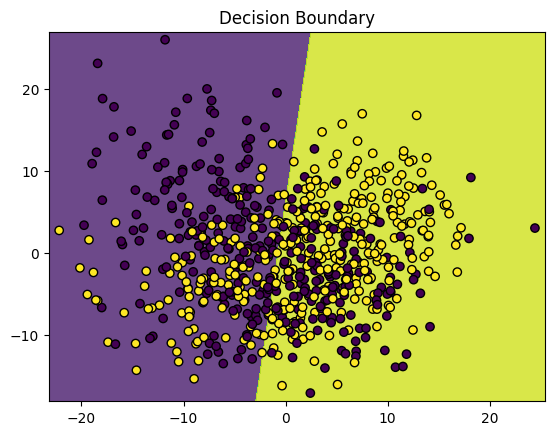

In [20]:
# Plotting the decision boundary (for visualization purposes)
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary using PCA-transformed data
plot_decision_boundary(best_model, X_train_pca, y_train)

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?

The ROC curve, or Receiver Operating Characteristic curve, is a graphical representation used to evaluate the performance of binary classification models, such as logistic regression. Here’s how it works and how it’s used:

### ROC Curve

1. **Plotting the ROC Curve**:
   - The ROC curve is a plot of the True Positive Rate (TPR) versus the False Positive Rate (FPR) at various threshold settings.
   - **True Positive Rate (TPR)**: Also known as sensitivity or recall, it is the ratio of true positives (correctly predicted positive cases) to the total actual positives. Mathematically, TPR = TP / (TP + FN).
   - **False Positive Rate (FPR)**: It is the ratio of false positives (incorrectly predicted positive cases) to the total actual negatives. Mathematically, FPR = FP / (FP + TN).

2. **Threshold Variation**:
   - In logistic regression, the model produces probabilities for each instance. By varying the threshold for classifying an instance as positive or negative, you get different TPR and FPR values.
   - The ROC curve shows how the TPR and FPR change with different threshold values.

### Using the ROC Curve

1. **Model Comparison**:
   - The ROC curve allows you to compare different models or algorithms. A model with a ROC curve that is consistently above another model’s curve indicates better performance.

2. **AUC (Area Under the Curve)**:
   - The Area Under the ROC Curve (AUC) is a single scalar value that summarizes the performance of the model across all threshold values. It ranges from 0 to 1, where a value of 0.5 indicates no discrimination (similar to random guessing), and a value of 1 indicates perfect classification.
   - A higher AUC value signifies a better model.

3. **Choosing the Threshold**:
   - The ROC curve can also help you select the optimal threshold for classification, balancing the trade-offs between TPR and FPR according to the specific needs of the problem.

### Practical Steps

1. **Generate Predictions**: Use the logistic regression model to get predicted probabilities for the positive class.
2. **Compute TPR and FPR**: For a range of threshold values, calculate TPR and FPR.
3. **Plot the ROC Curve**: Plot TPR (y-axis) against FPR (x-axis) for different thresholds.
4. **Evaluate**: Analyze the curve and the AUC to assess the model's performance.

The ROC curve is particularly useful when dealing with imbalanced datasets or when the cost of false positives and false negatives is different.

To demonstrate how to generate and evaluate the ROC curve for a logistic regression model using Python, you can use libraries such as scikit-learn, matplotlib, and numpy. Here’s a step-by-step program for solving this case:

In [22]:
## 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


## 2. Load Dataset

For this example, we'll use the Iris dataset and convert it into a binary classification problem (e.g., classifying if the species is Setosa or not).





In [23]:
# Load dataset
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Convert to binary classification (Setosa vs. non-Setosa)


## 3. Split Data

In [24]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4. Train Logistic Regression Model

In [25]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 5. Get Predictions

In [26]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


##6. Compute ROC Curve

In [27]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)


## 7. Plot ROC Curve

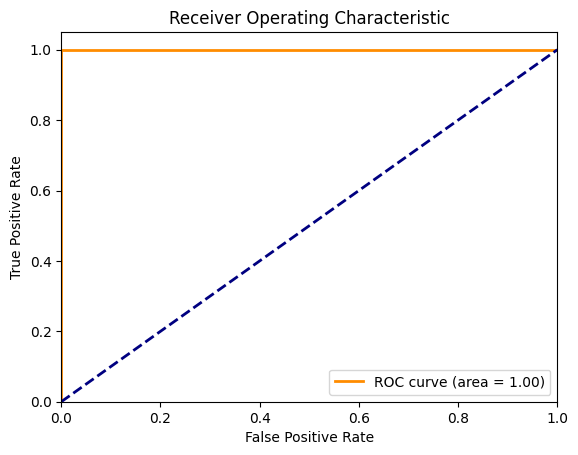

In [28]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


This code trains a logistic regression model on a binary classification problem, computes the ROC curve and AUC, and plots the ROC curve. You can adapt this code to different datasets and models as needed.

Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

Feature selection is crucial in logistic regression as it helps improve model performance by reducing overfitting, enhancing interpretability, and decreasing computational complexity. Here are some common techniques for feature selection in logistic regression:

1. **Filter Methods**:
   - **Statistical Tests**: Use tests like Chi-square, ANOVA, or correlation coefficients to evaluate the relationship between each feature and the target variable. Features that show significant relationships are selected.
   - **Information Gain**: Measures how much information a feature contributes to the target variable, selecting features with the highest gain.

2. **Wrapper Methods**:
   - **Forward Selection**: Starts with no features and adds one feature at a time, evaluating model performance at each step to determine if the new feature improves the model.
   - **Backward Elimination**: Starts with all features and iteratively removes the least significant ones based on model performance.
   - **Recursive Feature Elimination (RFE)**: Iteratively fits the model and removes the least important features, evaluating performance until only the most significant features remain.

3. **Embedded Methods**:
   - **Lasso Regression (L1 Regularization)**: Introduces a penalty for large coefficients, effectively setting some coefficients to zero. This results in a sparse model with only the most important features selected.
   - **Ridge Regression (L2 Regularization)**: Similar to Lasso but does not produce a sparse model; instead, it reduces the impact of less important features by shrinking their coefficients.
   - **Elastic Net**: Combines L1 and L2 regularization, providing a balance between Lasso and Ridge, and can handle correlated features better.

4. **Dimensionality Reduction**:
   - **Principal Component Analysis (PCA)**: Transforms features into a set of linearly uncorrelated components. Although not directly a feature selection method, PCA can reduce the feature space, which can be useful in logistic regression when dealing with multicollinearity or a high number of features.

### How These Techniques Improve Model Performance:

- **Reduces Overfitting**: By removing irrelevant or redundant features, the model is less likely to capture noise, leading to better generalization on new data.
- **Improves Model Interpretability**: Fewer features make the model simpler and easier to understand, which is particularly valuable for making informed decisions.
- **Decreases Computational Complexity**: Fewer features reduce the computational resources and time required for training and predicting, especially important in large datasets.

Choosing the right feature selection method often depends on the specific dataset and problem at hand, and sometimes a combination of techniques may be used for optimal results.

I'll provide an example of how you can use various feature selection techniques with logistic regression in Python using scikit-learn. We'll use a synthetic dataset for demonstration purposes.

Let's use the Wine dataset, which is also available in scikit-learn. The dataset contains features related to the chemical properties of wines, and it's often used for classification tasks.

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE



In [30]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target


In [31]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# 1. Filter Method - SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

In [39]:
# Train and evaluate a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_kbest, y_train)
print("Filter Method - Accuracy:", model.score(X_test_kbest, y_test))


Filter Method - Accuracy: 1.0


In [40]:
# 2. Wrapper Method - Recursive Feature Elimination (RFE)
estimator = LogisticRegression(max_iter=200)
selector_rfe = RFE(estimator, n_features_to_select=5, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector_rfe.transform(X_test_scaled)

# Train and evaluate a logistic regression model
model.fit(X_train_rfe, y_train)
print("Wrapper Method - Accuracy:", model.score(X_test_rfe, y_test))


Wrapper Method - Accuracy: 1.0


In [42]:
# 3. Embedded Method - Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
# Use coefficients to select features
selected_features = np.where(lasso.coef_ != 0)[0]
X_train_lasso = X_train_scaled[:, selected_features]
X_test_lasso = X_test_scaled[:, selected_features]

# Train and evaluate a logistic regression model
model.fit(X_train_lasso, y_train)
print("Lasso Regression - Accuracy:", model.score(X_test_lasso, y_test))

Lasso Regression - Accuracy: 0.9629629629629629


In [44]:
# 4. Dimensionality Reduction - PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train and evaluate a logistic regression model
model.fit(X_train_pca, y_train)
print("PCA - Accuracy:", model.score(X_test_pca, y_test))

PCA - Accuracy: 0.9814814814814815


Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?

Handling imbalanced datasets in logistic regression is crucial for ensuring that the model performs well across all classes, especially the minority class. Here are some strategies for addressing class imbalance:

1. **Resampling Techniques:**
   - **Oversampling the Minority Class:** Increase the number of instances in the minority class by duplicating existing instances or generating new ones (e.g., using Synthetic Minority Over-sampling Technique (SMOTE)).
   - **Undersampling the Majority Class:** Reduce the number of instances in the majority class to balance the dataset. This can be done randomly or using more sophisticated techniques.

2. **Class Weight Adjustment:**
   - Modify the weights of classes in the logistic regression algorithm to make the model pay more attention to the minority class. In scikit-learn, this can be done using the `class_weight` parameter in the `LogisticRegression` class.

3. **Anomaly Detection Methods:**
   - Treat the problem as an anomaly detection task if the minority class is extremely rare. Methods like One-Class SVM or Isolation Forest can be used in conjunction with logistic regression.

4. **Algorithmic Adjustments:**
   - Use algorithms specifically designed for imbalanced datasets or incorporate ensemble methods such as Balanced Random Forests or EasyEnsemble.

5. **Evaluation Metrics:**
   - Use evaluation metrics that are more informative for imbalanced datasets, such as Precision, Recall, F1-score, or the Area Under the ROC Curve (AUC-ROC), rather than just accuracy.

6. **Cross-validation:**
   - Ensure that your cross-validation strategy is appropriate for imbalanced datasets. Stratified k-fold cross-validation can help maintain the proportion of classes in each fold.

7. **Threshold Adjustment:**
   - Adjust the decision threshold for classification to improve performance on the minority class. The default threshold is 0.5, but you can tune this value based on the precision-recall tradeoff.

By employing these strategies, you can better manage the impact of class imbalance and improve the performance of your logistic regression model.


Certainly! Let’s use the popular Credit Card Fraud Detection dataset from Kaggle as an example of handling imbalanced data in a real-world scenario.

Steps:
1. Download the Dataset: You can download the dataset from Kaggle here.

2. Load the Dataset: Use pandas to load the data.

3. Preprocess the Data: Handle missing values, encode categorical variables, and split the data.

4. Handle Imbalance: Use resampling techniques or class weight adjustments.

5. Train and Evaluate: Train a logistic regression model and evaluate its performance.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [58]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')


In [59]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89215,62476,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,...,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,112.18,0.0
89216,62476,1.121527,0.208353,0.202133,1.138648,0.068794,-0.158828,0.176503,-0.105339,-0.145071,...,0.115269,0.354326,-0.179000,-0.240712,0.663680,-0.237553,0.031241,0.025737,53.64,0.0
89217,62478,-1.344549,0.543027,1.991882,-1.118447,-0.949264,0.196963,-0.070728,0.809195,0.331360,...,-0.134573,-0.417982,-0.071393,0.047068,0.267058,0.861676,0.067080,0.042724,69.00,0.0
89218,62480,0.789027,-1.180048,-0.633627,-0.141463,-0.317314,-0.124994,0.407588,-0.286734,-1.371513,...,-0.567100,-1.844598,-0.140709,-0.779335,0.129177,0.184364,-0.076960,0.060438,328.80,0.0


In [60]:
# Drop rows with missing target values
df = df.dropna(subset=['Class'])

In [61]:
# Check for missing values in features
X = df.drop('Class', axis=1)
y = df['Class']
if X.isnull().sum().any():
    X = X.fillna(X.median())  # Impute missing values with median, or use another method


In [48]:
# Split features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


In [62]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89214,62476,-2.273272,-1.629542,2.841362,0.456953,-0.807096,-0.263406,-0.053362,0.427932,1.162215,...,0.908070,0.200205,0.122220,0.612420,0.713318,0.515045,0.478844,0.151789,0.175091,294.00
89215,62476,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,...,0.365671,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,112.18
89216,62476,1.121527,0.208353,0.202133,1.138648,0.068794,-0.158828,0.176503,-0.105339,-0.145071,...,0.000990,0.115269,0.354326,-0.179000,-0.240712,0.663680,-0.237553,0.031241,0.025737,53.64
89217,62478,-1.344549,0.543027,1.991882,-1.118447,-0.949264,0.196963,-0.070728,0.809195,0.331360,...,0.053575,-0.134573,-0.417982,-0.071393,0.047068,0.267058,0.861676,0.067080,0.042724,69.00


In [63]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
89214,0.0
89215,0.0
89216,0.0
89217,0.0


In [55]:
# Check for missing values in the target variable
print(df['Class'].isnull().sum())


1


In [56]:
#Drop Rows with Missing Target Values:

df = df.dropna(subset=['Class'])


In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [65]:
# Create resampling strategies
oversample = SMOTE(sampling_strategy='auto', random_state=42)
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)


In [66]:
# Create a pipeline with oversampling and logistic regression
pipeline = Pipeline([
('oversample', oversample),
    ('undersample', undersample),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42))
])


In [67]:
# Fit the model
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('undersample', RandomUnderSampler(random_state=42)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [68]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [69]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[26373   323]
 [   11    59]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     26696
         1.0       0.15      0.84      0.26        70

    accuracy                           0.99     26766
   macro avg       0.58      0.92      0.63     26766
weighted avg       1.00      0.99      0.99     26766



Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

When implementing logistic regression, several common issues and challenges might arise. Here are some of the key challenges and ways to address them:

1. **Multicollinearity:**
   - **Issue:** Multicollinearity occurs when independent variables are highly correlated with each other. This can lead to instability in the coefficient estimates and make it difficult to assess the impact of each predictor.
   - **Solution:** To address multicollinearity, you can:
     - **Remove Highly Correlated Variables:** Use correlation matrices or variance inflation factors (VIF) to identify and remove variables that are highly correlated.
     - **Regularization:** Apply regularization techniques like Lasso (L1 regularization) or Ridge (L2 regularization) regression, which can help mitigate the impact of multicollinearity by penalizing large coefficients.

2. **Overfitting:**
   - **Issue:** Overfitting occurs when the model is too complex and captures noise rather than the underlying pattern, leading to poor generalization on unseen data.
   - **Solution:** To prevent overfitting:
     - **Regularization:** Apply regularization techniques to penalize large coefficients and reduce model complexity.
     - **Cross-Validation:** Use cross-validation to assess model performance and ensure that it generalizes well to new data.

3. **Class Imbalance:**
   - **Issue:** When the classes in the target variable are imbalanced, the model may be biased toward the majority class.
   - **Solution:** To handle class imbalance:
     - **Resampling Techniques:** Use techniques like oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
     - **Class Weights:** Adjust class weights in the logistic regression model to give more importance to the minority class.

4. **Non-Linearity:**
   - **Issue:** Logistic regression assumes a linear relationship between the predictors and the log-odds of the outcome. If the relationship is non-linear, the model may not perform well.
   - **Solution:** To address non-linearity:
     - **Feature Engineering:** Create polynomial features or interaction terms to capture non-linear relationships.
     - **Transformations:** Apply transformations (e.g., log transformations) to the predictors to better capture the relationship with the target variable.

5. **Outliers:**
   - **Issue:** Outliers can disproportionately influence the model, leading to biased estimates and poor performance.
   - **Solution:** To handle outliers:
     - **Detection:** Use statistical methods or visualization techniques to identify outliers.
     - **Robust Methods:** Consider using robust methods or techniques to reduce the impact of outliers.

6. **Feature Scaling:**
   - **Issue:** Logistic regression can be sensitive to the scale of the features, which may affect the convergence of the optimization algorithm.
   - **Solution:** Scale features to have a mean of zero and a standard deviation of one using techniques like standardization.

By addressing these challenges, you can improve the performance and reliability of your logistic regression model.

 Python program that demonstrates how to handle some of the common issues with logistic regression using the scikit-learn library. The example will include handling multicollinearity, class imbalance, and feature scaling. For simplicity, we'll use the popular Iris dataset and assume a binary classification problem.

In [70]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [72]:
# Binary classification: Use only class 0 and 1 for binary classification
df = df[df['target'].isin([0, 1])]


In [73]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']


In [74]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [75]:
# Handling multicollinearity with VarianceThreshold
# Remove features with low variance
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)


In [76]:
# Handling class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))


In [77]:
# Logistic Regression with regularization
log_reg = LogisticRegression(class_weight=class_weights_dict, solver='liblinear')


In [78]:
# Feature scaling and polynomial features
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('model', log_reg)
])

In [79]:

# Fit the model
pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model',
                 LogisticRegression(class_weight={0: 1.0606060606060606,
                                                  1: 0.9459459459459459},
                                    solver='liblinear'))])

Confusion Matrix:
[[17  0]
 [ 0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<ipython-input-83-29e57a54182b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


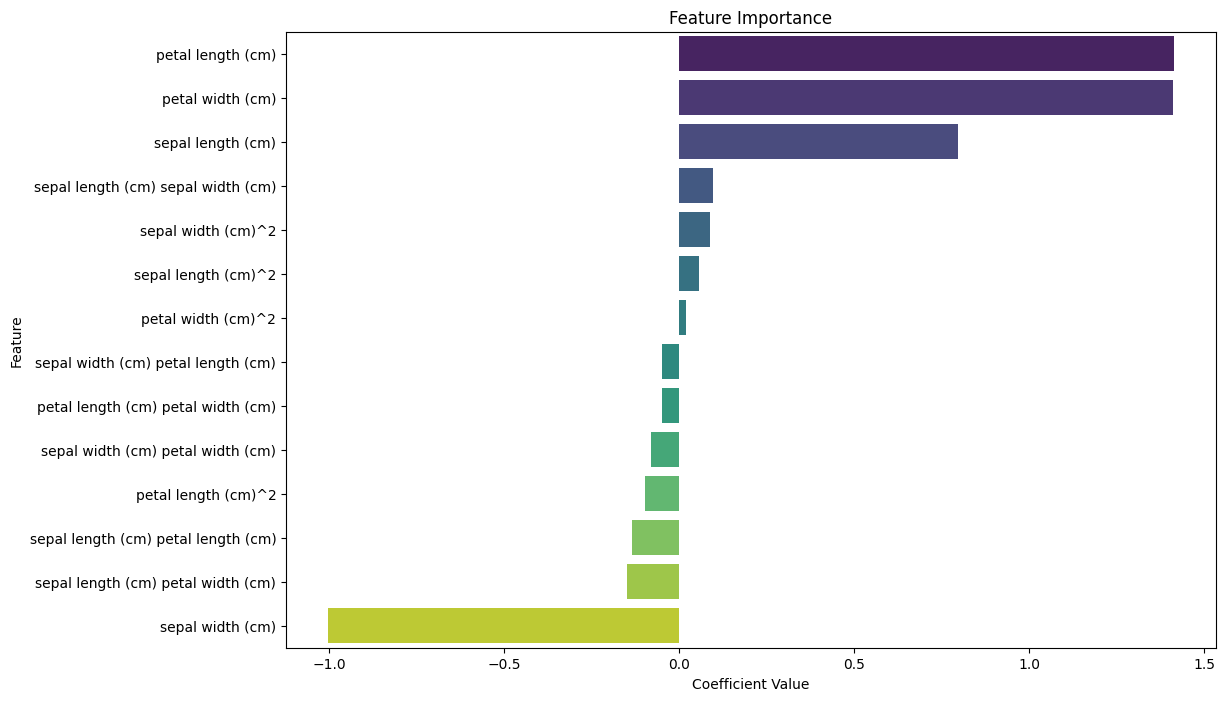

In [83]:
# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature names from PolynomialFeatures
poly_features = pipeline.named_steps['poly']
feature_names = poly_features.get_feature_names_out(X.columns)

# Compute feature importance based on the expanded feature set
coef = pipeline.named_steps['model'].coef_[0]
feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Let's use the Titanic dataset for this example, which is a classic dataset for binary classification problems. The Titanic dataset is available via the seaborn library or can be loaded from other sources. We'll focus on handling common issues such as multicollinearity, class imbalance, and feature scaling.

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age', 'fare', 'embarked', 'sex', 'pclass'])


In [86]:
# Convert categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [87]:
# Define features and target
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']


In [88]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [89]:
# Handling multicollinearity with VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)


In [90]:
# Handling class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))


In [91]:
# Logistic Regression with regularization
log_reg = LogisticRegression(class_weight=class_weights_dict, solver='liblinear')


In [92]:
# Feature scaling and polynomial features
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('model', log_reg)
])

In [93]:
# Fit the model
pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model',
                 LogisticRegression(class_weight={0: 0.8245033112582781,
                                                  1: 1.2704081632653061},
                                    solver='liblinear'))])

In [94]:

# Predict and evaluate the model
y_pred = pipeline.predict(X_test_selected)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[104  18]
 [ 27  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       122
           1       0.78      0.71      0.74        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [97]:
# Extract polynomial features
poly_features = pipeline.named_steps['poly'].get_feature_names_out(input_features=X.columns)
coef = pipeline.named_steps['model'].coef_[0]


<ipython-input-98-8adb93ceda26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


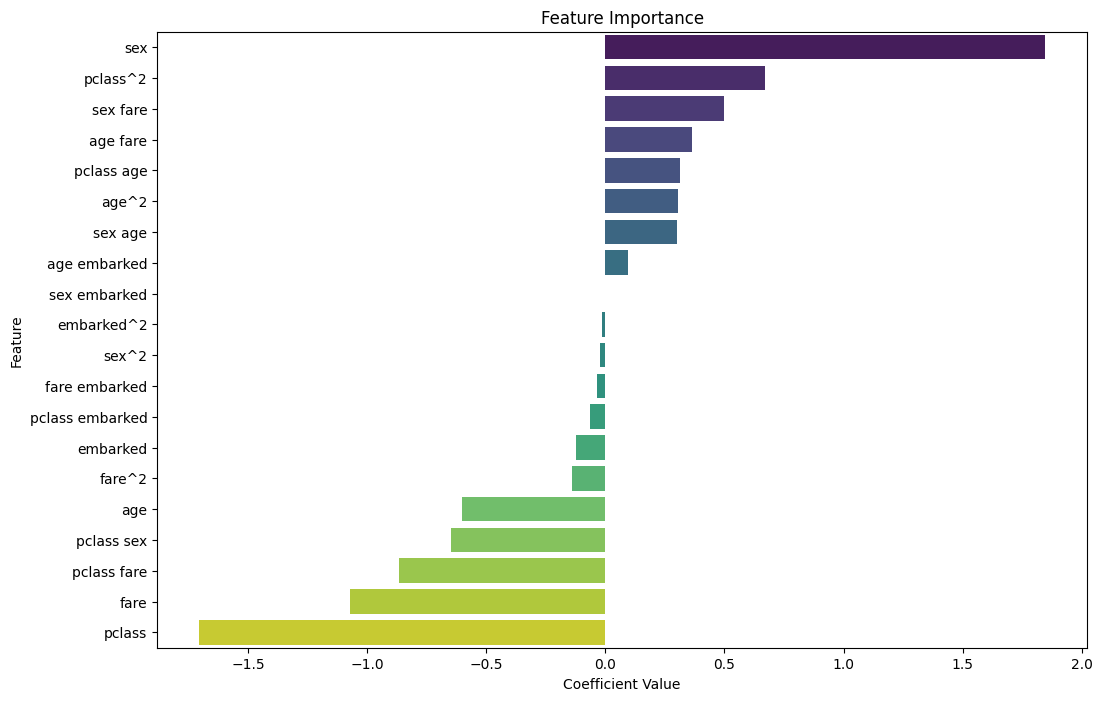

In [98]:
# Ensure correct length
if len(coef) == len(poly_features):
    feature_importance = pd.Series(coef, index=poly_features).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
    plt.title('Feature Importance')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Mismatch between number of features and number of coefficients.")